<a href="https://colab.research.google.com/github/gaurav280303/MACHINE-LEARNING---NOTES-and-CODES/blob/main/Ford_LINEARREGRESSION_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Try common filename patterns
df = pd.read_csv("/content/ford.csv")
df


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


In [ ]:
df.shape

(17966, 9)

In [ ]:
print(df.info)
df.describe()

<bound method DataFrame.info of          model  year  price transmission  mileage fuelType  tax   mpg  \
0       Fiesta  2017  12000    Automatic    15944   Petrol  150  57.7   
1        Focus  2018  14000       Manual     9083   Petrol  150  57.7   
2        Focus  2017  13000       Manual    12456   Petrol  150  57.7   
3       Fiesta  2019  17500       Manual    10460   Petrol  145  40.3   
4       Fiesta  2019  16500    Automatic     1482   Petrol  145  48.7   
...        ...   ...    ...          ...      ...      ...  ...   ...   
17961    B-MAX  2017   8999       Manual    16700   Petrol  150  47.1   
17962    B-MAX  2014   7499       Manual    40700   Petrol   30  57.7   
17963    Focus  2015   9999       Manual     7010   Diesel   20  67.3   
17964       KA  2018   8299       Manual     5007   Petrol  145  57.7   
17965    Focus  2015   8299       Manual     5007   Petrol   22  57.7   

       engineSize  
0             1.0  
1             1.0  
2             1.0  
3          

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [ ]:
df.isnull().sum()  #No null value , daata is clean

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


<Axes: xlabel='price', ylabel='Count'>

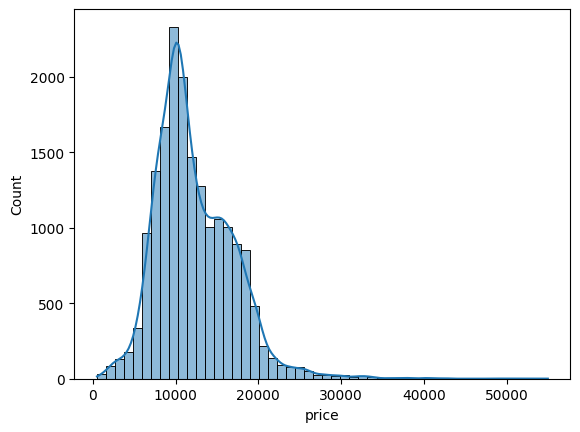

In [ ]:
sns.histplot(df['price'], bins=50, kde=True)

In [ ]:
#To check whether all my numeric column are corelated to price or not

df.corr(numeric_only=True)

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.636009,-0.707818,0.298506,-0.022967,-0.137311
price,0.636009,1.000000,-0.530659,0.406857,-0.346419,0.411178
mileage,-0.707818,-0.530659,1.000000,-0.260451,0.120075,0.215035
tax,0.298506,0.406857,-0.260451,1.000000,-0.502980,0.184363
mpg,-0.022967,-0.346419,0.120075,-0.502980,1.000000,-0.260521
engineSize,-0.137311,0.411178,0.215035,0.184363,-0.260521,1.000000


<Axes: >

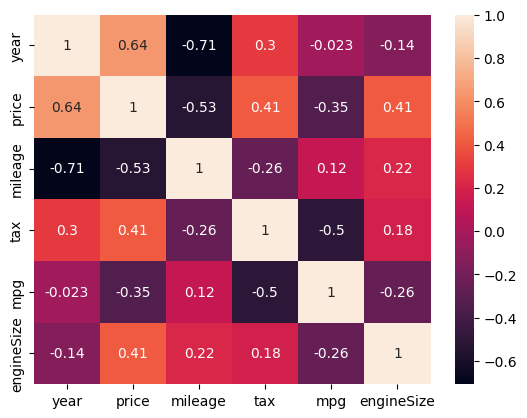

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

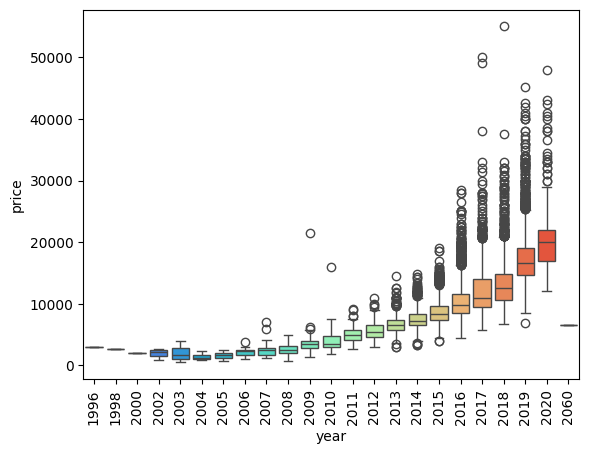

In [ ]:
#To check the relation between price and year
sns.boxplot(data=df, x='year', y='price', palette='rainbow')
plt.xticks(rotation=90) #To reducing oberlapping in x axis
plt.show()

Posistive correlation betweeen year and price

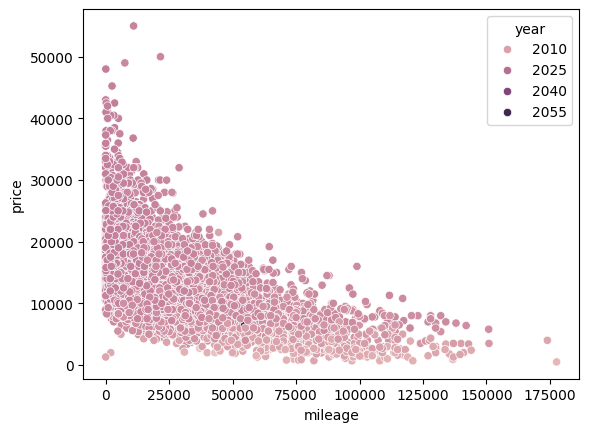

In [ ]:
sns.scatterplot(data=df, x='mileage', y='price', hue='year' )
plt.show()

Negative correlation between price and mileage

<Axes: xlabel='engineSize', ylabel='price'>

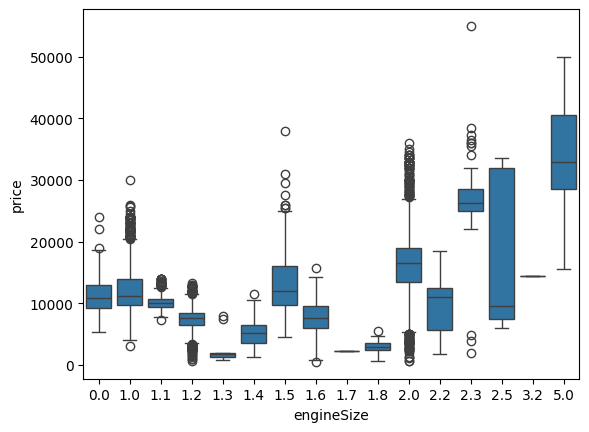

In [ ]:
sns.boxplot(data=df, x='engineSize', y='price')

Like some engine sizes price are too low like 1.7, 1.3, etc and some are high like 5.0 , but positively corelated

<Axes: xlabel='transmission', ylabel='price'>

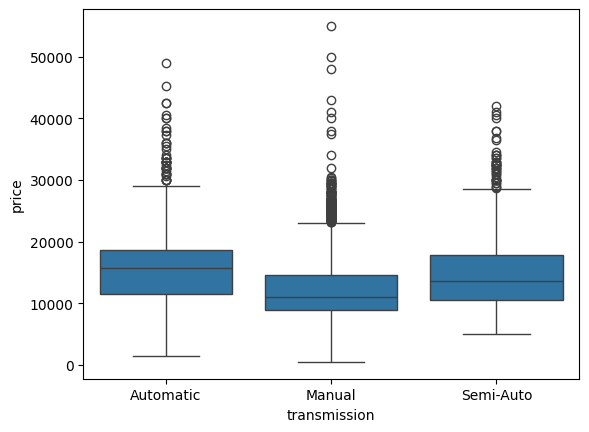

In [ ]:
sns.boxplot(data=df, x='transmission', y='price')

ALl 3 transmission price is almost same and have same distribution, and not much correllated

<Axes: xlabel='fuelType', ylabel='price'>

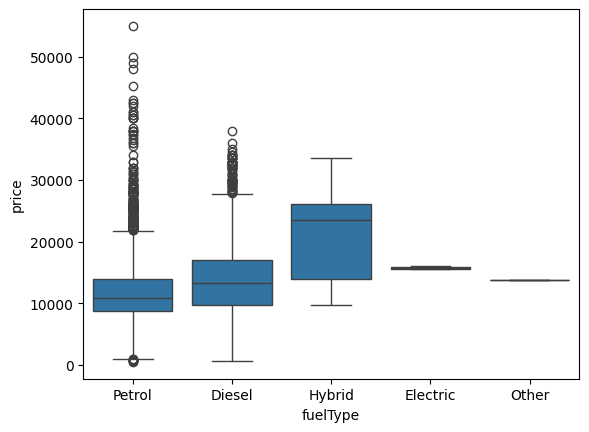

In [ ]:
sns.boxplot(data=df, x='fuelType', y='price')

<Axes: xlabel='fuelType', ylabel='price'>

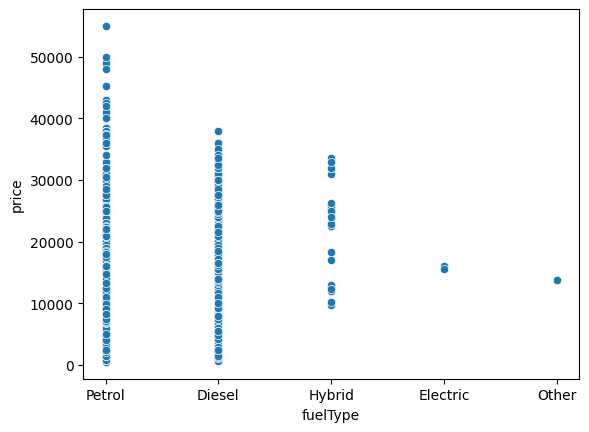

In [ ]:
sns.scatterplot(data=df, x='fuelType', y='price')

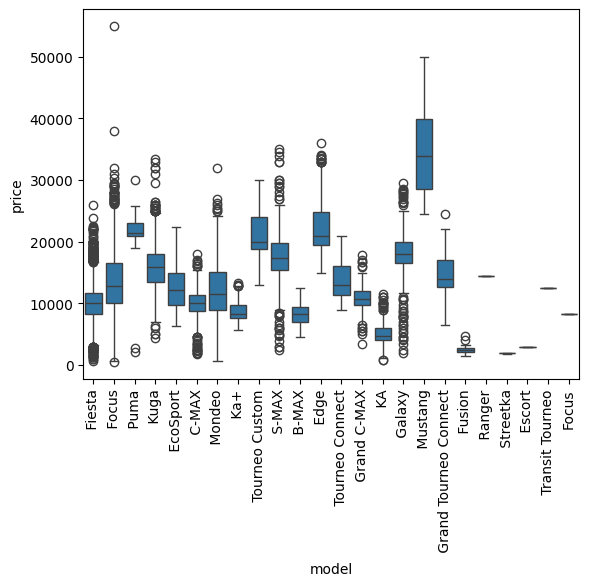

In [ ]:
sns.boxplot(data=df, x='model', y='price')
plt.xticks(rotation = 90)
plt.show()

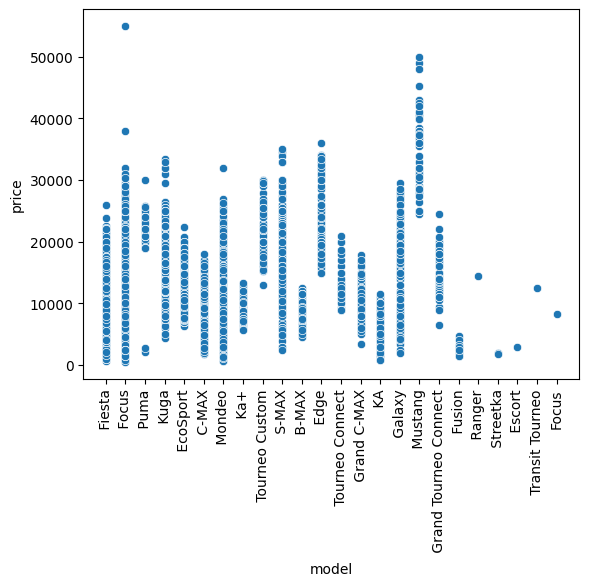

In [ ]:
sns.scatterplot(data=df, x='model', y='price')
plt.xticks(rotation = 90)
plt.show()

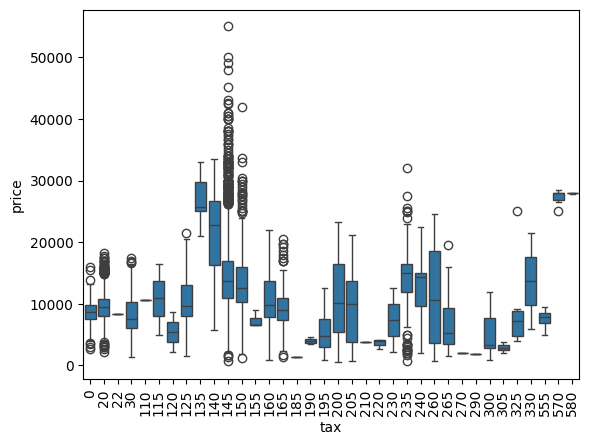

In [ ]:
sns.boxplot(x=df['tax'], y=df['price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
x=df.drop('price', axis=1)
y=df['price']

In [ ]:
print(x)

         model  year transmission  mileage fuelType  tax   mpg  engineSize
0       Fiesta  2017    Automatic    15944   Petrol  150  57.7         1.0
1        Focus  2018       Manual     9083   Petrol  150  57.7         1.0
2        Focus  2017       Manual    12456   Petrol  150  57.7         1.0
3       Fiesta  2019       Manual    10460   Petrol  145  40.3         1.5
4       Fiesta  2019    Automatic     1482   Petrol  145  48.7         1.0
...        ...   ...          ...      ...      ...  ...   ...         ...
17961    B-MAX  2017       Manual    16700   Petrol  150  47.1         1.4
17962    B-MAX  2014       Manual    40700   Petrol   30  57.7         1.0
17963    Focus  2015       Manual     7010   Diesel   20  67.3         1.6
17964       KA  2018       Manual     5007   Petrol  145  57.7         1.2
17965    Focus  2015       Manual     5007   Petrol   22  57.7         1.0

[17966 rows x 8 columns]


In [ ]:
y

,price
0,12000
1,14000
2,13000
3,17500
4,16500
...,...
17961,8999
17962,7499
17963,9999
17964,8299


In [ ]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [ ]:
categorical_columns=['model', 'transmission', 'fuelType']

ONE HOT ENCODING

In [ ]:
x_onehot_encoded=pd.get_dummies(x, columns=categorical_columns, drop_first=True)
x_onehot_encoded

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,150,57.7,1.0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,2018,9083,150,57.7,1.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2017,12456,150,57.7,1.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,2019,10460,145,40.3,1.5,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
4,2019,1482,145,48.7,1.0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,16700,150,47.1,1.4,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
17962,2014,40700,30,57.7,1.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
17963,2015,7010,20,67.3,1.6,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
17964,2018,5007,145,57.7,1.2,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True


column get increased from 8 to 34

In [ ]:
x_onehot_encoded=x_onehot_encoded.astype(int)
x_encoded

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,150,57,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2018,9083,150,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2017,12456,150,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2019,10460,145,40,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,2019,1482,145,48,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,16700,150,47,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17962,2014,40700,30,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17963,2015,7010,20,67,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17964,2018,5007,145,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


LABEL ENCODING on same categorical columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
x_label_encoded=x
x_label_encoded



,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,Manual,5007,Petrol,145,57.7,1.2


In [ ]:
for i in categorical_columns:
  x_label_encoded[i]=LabelEncoder().fit_transform(x_label_encoded[i]) #IT will run loop from i=1,2,3 inside the categorical column elemnts[year, transmission,model]
#It will prevent to create multiple rows, rows will not increase, instead it will do encoding inside the col in 0,1,2,3...

In [ ]:
x_label_encoded

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,0,15944,4,150,57.7,1.0
1,6,2018,1,9083,4,150,57.7,1.0
2,6,2017,1,12456,4,150,57.7,1.0
3,5,2019,1,10460,4,145,40.3,1.5
4,5,2019,0,1482,4,145,48.7,1.0
...,...,...,...,...,...,...,...,...
17961,0,2017,1,16700,4,150,47.1,1.4
17962,0,2014,1,40700,4,30,57.7,1.0
17963,6,2015,1,7010,0,20,67.3,1.6
17964,11,2018,1,5007,4,145,57.7,1.2


We have x data(input data) , both in form of onehot code encoding and label encoding and now we wiill check in which the model is performing good

STANDARD SCALING

In [ ]:
#We will do Std Scaling foe year, mieague and other column s which have high value
from sklearn.preprocessing import StandardScaler

In [ ]:
numerichigh_cols=['year', 'mileage', 'tax', 'mpg', 'engineSize']
scaler=StandardScaler()
x_onehot_encoded[numerichigh_cols]=scaler.fit_transform(x_onehot_encoded[numerichigh_cols])

In [ ]:
x_onehot_encoded

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.065128,-0.380998,0.591358,-0.042122,-0.447984,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0.552866,-0.733359,0.591358,-0.042122,-0.447984,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.065128,-0.560132,0.591358,-0.042122,-0.447984,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1.040605,-0.662640,0.510727,-1.721198,-0.447984,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,1.040605,-1.123724,0.510727,-0.931045,-0.447984,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,0.065128,-0.342172,0.591358,-1.029814,-0.447984,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17962,-1.398088,0.890398,-1.343791,-0.042122,-0.447984,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17963,-0.910349,-0.839822,-1.505053,0.945569,-0.447984,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17964,0.552866,-0.942690,0.510727,-0.042122,-0.447984,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
#Standard Scaling for x_label encoding

x_label_encodedd=scaler.fit_transform(x_label_encoded)
x_label_encoded_df=pd.DataFrame(x_label_encodedd)
x_label_encoded_df

,0,1,2,3,4,5,6,7
0,-0.460699,0.065128,-2.670032,-0.380998,0.688777,0.591358,-0.020442,-0.811386
1,-0.211477,0.552866,0.041351,-0.733359,0.688777,0.591358,-0.020442,-0.811386
2,-0.211477,0.065128,0.041351,-0.560132,0.688777,0.591358,-0.020442,-0.811386
3,-0.460699,1.040605,0.041351,-0.662640,0.688777,0.510727,-1.738890,0.345070
4,-0.460699,1.040605,-2.670032,-1.123724,0.688777,0.510727,-0.909294,-0.811386
...,...,...,...,...,...,...,...,...
17961,-1.706810,0.065128,0.041351,-0.342172,0.688777,0.591358,-1.067312,0.113779
17962,-1.706810,-1.398088,0.041351,0.890398,0.688777,-1.343791,-0.020442,-0.811386
17963,-0.211477,-0.910349,0.041351,-0.839822,-1.454098,-1.505053,0.927668,0.576362
17964,1.034634,0.552866,0.041351,-0.942690,0.688777,0.510727,-0.020442,-0.348804


NOW CREATE MODELS FOR BOTH ONE HOT ENCODED AND  LABEL ENCODED

MODEL FOR ONEHOT ENCODED

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x_onehot_encoded, y, test_size=0.2, random_state=42)

In [ ]:
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred =model.predict(x_test)
y_prediction=pd.DataFrame(y_pred)
y_prediction

,0
0,6866.358076
1,9347.681013
2,9362.183208
3,4547.627872
4,2211.832724
...,...
3589,18615.170603
3590,12010.265805
3591,31454.952875
3592,9781.203628


In [ ]:
y_test

,price
17610,6995
7076,8999
1713,7998
1611,5491
16830,3790
...,...
7731,22000
11655,13699
10536,24979
11885,10500


In [ ]:
r2_value = r2_score(y_test, y_pred)
r2_value

0.8464177711972799

MODEL FOR LABEL ENCODED DATA

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x_label_encoded_df, y, test_size=0.2, random_state=42)

In [ ]:
model2=LinearRegression()
model2.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred =model2.predict(x_test)
y_prediction=pd.DataFrame(y_pred)
y_prediction

,0
0,6152.075677
1,9374.391344
2,9464.922643
3,4598.461319
4,3495.610912
...,...
3589,19692.836281
3590,12192.597394
3591,21787.053125
3592,9776.439264


In [ ]:
y_test

,price
17610,6995
7076,8999
1713,7998
1611,5491
16830,3790
...,...
7731,22000
11655,13699
10536,24979
11885,10500


In [ ]:
r2_valuee=r2_score(y_test, y_pred)
r2_valuee

0.7365884288851352